In [22]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
#list of libraries
from datetime import date
import praw
import pandas as pd
import datetime as dt
pd.set_option('display.max_rows', 500)
from bs4 import BeautifulSoup
import requests
import time

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Analysis: Score Media and Gaming

In [2]:
print("""This does not constitute financial advice""")
ticker_symbol = 'SCR'
today = date.today()

print("Ticker Symbol: " + ticker_symbol)
print("Last Update Date:", today)

This does not constitute financial advice
Ticker Symbol: SCR
Last Update Date: 2021-08-31


## 1. Business Overview

In [3]:
stock = ticker_symbol
r = requests.get("https://ca.finance.yahoo.com/quote/" + stock + "/profile?p=" + stock).text

time.sleep(2)

soup = BeautifulSoup(r,"html.parser")

#print(soup.prettify())

#soup.find_all("tbody")

ps = soup.find_all('p')

if len(ps)<= 4:
    # try from the Toronto stock exchange
    r = requests.get("https://ca.finance.yahoo.com/quote/" + stock + ".TO" + "/profile?p=" + stock + ".TO").text
    soup = BeautifulSoup(r,"html.parser")
    ps = soup.find_all('p')

    # try from another Stock exchange
    if len(ps) <= 4:
            r = requests.get("https://ca.finance.yahoo.com/quote/" + stock + ".V" + "/profile?p=" + stock + ".V").text
            soup = BeautifulSoup(r,"html.parser")
            ps = soup.find_all('p')

print(color.BOLD  + "From Yahoo Finance: " + str(stock) + color.END)
print(" ")

for p in ps[1:]:
    print(p.get_text())
    print(" ")

From Yahoo Finance: SCR
 
Our engineers are working quickly to resolve the issue.
 


## 2. Estimating Revenues Once Online Sports Betting Become Legal in Canada

### 2.1 Model's Assumptions

In [4]:
print("Assumptions about market size:")
print(" -Total North American addressable market is $22.3B USD")
print(" -Total Canadian addressable market is $4.3B USD")
print(" -Total US addressable market is $18B USD")
print(" -Total Ontario addressable market is $1.7B USD")

print(" ")
print("Assumptions about SCR's penetration rate:")
print(" -Through its theScore App, SCR has a 10% penetration rate in Ontario")
print(" -For the bear case, I assume a similar penetration rate for the online sports betting market")


print(" ")
print("Assumptions about other variables:")
print(" -Currently SCR has 50.40M outstanding shares. We expect to see at most 100% dilution in the next 5 years.")
print(" -In the past 5 years, we have seen a similar rate of share dilution and I expect that SCR will continue to leverage capital to fuel their growth")
print(" -We use a super conservative P/S ratio of 10")

print("")
print("Note: most of the estimates come from data taken the Q2 2021 presentation: https://mobile.thescore.com/investor-relations/")

Assumptions about market size:
 -Total North American addressable market is $22.3B USD
 -Total Canadian addressable market is $4.3B USD
 -Total US addressable market is $18B USD
 -Total Ontario addressable market is $1.7B USD
 
Assumptions about SCR's penetration rate:
 -Through its theScore App, SCR has a 10% penetration rate in Ontario
 -For the bear case, I assume a similar penetration rate for the online sports betting market
 
Assumptions about other variables:
 -Currently SCR has 50.40M outstanding shares. We expect to see at most 100% dilution in the next 5 years.
 -In the past 5 years, we have seen a similar rate of share dilution and I expect that SCR will continue to leverage capital to fuel their growth
 -We use a super conservative P/S ratio of 10

Note: most of the estimates come from data taken the Q2 2021 presentation: https://mobile.thescore.com/investor-relations/


#### 2.2 Bear Case 

In [5]:
ps_ratio = 10
bear_case_rev = ((0.10*1.7)+(0.01*18)+(0.01*(4.3-1.7)))*1000
#print(bear_case_rev)
#print("Assuming a 100% stock dilution and a PS of " + str(ps_ratio))
est_out_shares = (50.40*2)*1000000
#print(bear_case_out_shares)
bear_stock_price = ((bear_case_rev)/est_out_shares)*ps_ratio

print("For the bear case, we assume a 10% penetration rate in Ontario, 1% in other provinces and 1% in the US")
print("This would result in revenues of " + str(int(bear_case_rev)) + "K by 2025")

For the bear case, we assume a 10% penetration rate in Ontario, 1% in other provinces and 1% in the US
This would result in revenues of 376K by 2025


#### 2.2 Bull Case

In [6]:
ps_ratio = 10
bull_case_rev = ((0.15*1.7)+(0.05*18)+(0.05*(4.3-1.7)))*1000
#print(bear_case_rev)
#print("Assuming a 100% stock dilution and a PS of " + str(ps_ratio))
est_out_shares = (50.40*2)*1000000
#print(bear_case_out_shares)
bull_stock_price = ((bull_case_rev)/est_out_shares)*ps_ratio

print("For the bull case, we assume a 15% penetration rate in Ontario, 5% in other provinces and 5% in the US")
print("This would result in revenues of " + str(int(bull_case_rev)) + "K by 2025")

For the bull case, we assume a 15% penetration rate in Ontario, 5% in other provinces and 5% in the US
This would result in revenues of 1285K by 2025


## 3. Monte Carlo Simulation for Expected Revenue for The Next 5 Years

In [7]:
print("I assumed that my bear and bull cases represent 2 standard deviation from my mean for the Monte Carlo simulation")

I assumed that my bear and bull cases represent 2 standard deviation from my mean for the Monte Carlo simulation


In [8]:
# distribution for revenue
mean = ((bull_case_rev-bear_case_rev)/2)+bear_case_rev

#I will assume that my bear and bull case are 2 standard deviation away from my mean. It means that 95% should fall within these 2 values.
sd = (bull_case_rev-mean)/2

import numpy as np
mu, sigma = mean, sd
s = np.random.normal(mu, sigma, 1000000)


In [9]:
%%capture 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100000)
plt.title("Distribution of Revenue in 1000's")
plt.xlabel("Revenue in 1000's")
plt.ylabel('count')
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [10]:
%%capture 
import numpy as np
import random
from matplotlib import pyplot as plt

data = np.array(s)

# fixed bin size
bins = np.arange(data.min(), data.max(), 10) # fixed bin size

#plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=1)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

In [12]:
%%capture

# getting the standard deviation for the stock
import yfinance as yf
data = yf.download('SCR', '2020-04-21', '2021-04-21')
data["Adj Close"].plot()
plt.title("Stock Price Over Time")
plt.show()

In [13]:
stock_mean = data['Adj Close'].mean()
stock_std = data['Adj Close'].std()
#print(stock_mean)
#print("The standard deviation is " + str(int(stock_std)))
#print("The coefficient of variation is " + str(float(stock_std/stock_mean)))

In [14]:
#applying the coefficient of variation to my assumed P/S ratio.
sigma = (ps_ratio*(stock_std/stock_mean)) #applying the same standard deviation that we have seen in the last few years to my stock in the future
#print(sigma)
ps_ratios = np.random.normal(ps_ratio, sigma, 1000000)
ps_ratios[ps_ratios <= 0] = 1 #because we cannot have a ps ratio that is lower than 1

In [15]:
#variables: revenue (normal distribution), est_out_shares(constant), ps_ratio (normal distribution)
import random

prices = []
for i in range(0, 10000):
    rev = random.choice(s)*1000000 # revenue. Multiply by 1000,000 to get billions
    rev_per_shares = rev/est_out_shares
    stock_price = rev_per_shares*10#random.choice(ps_ratios)
    prices.append(stock_price)
    
prices = np.array(prices)


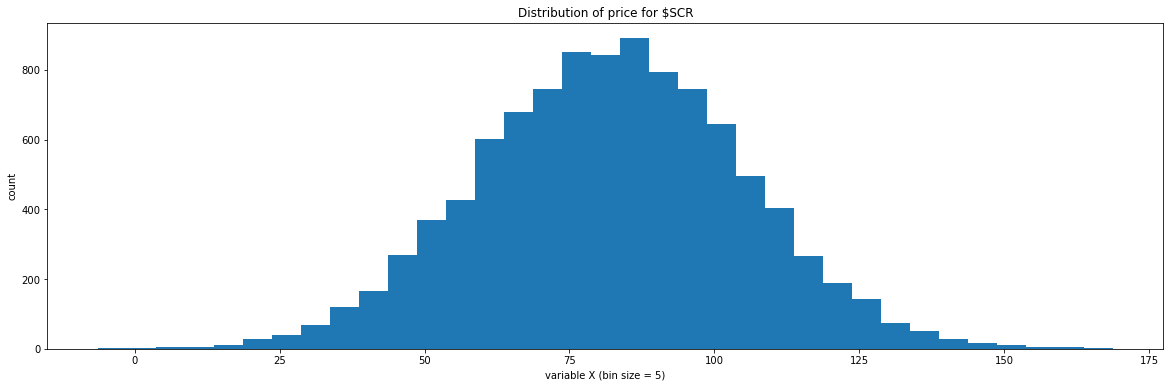

In [16]:
import numpy as np
import random
from matplotlib import pyplot as plt

data = prices

# fixed bin size
bins = np.arange(data.min(), data.max(), 5) # fixed bin size

#plt.xlim([min(data)-5, max(data)+5])

fig, ax = plt.subplots(figsize=(20,6))
plt.hist(data, bins=bins, alpha=1)
plt.title('Distribution of price for $SCR')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

#### Fair Value Today

In [17]:
fair_price_now = data.mean()*((1-0.10)**4)

In [18]:
print("The expected share price in 2025 is " + str(int(data.mean())) + '$')
print("The bear case share price for 2025 is " + str(int(np.percentile(prices, 2.5))) + '$')
print("The bull case share price for 2025 is " + str(int(np.percentile(prices, 97.5))) + '$')

The expected share price in 2025 is 82$
The bear case share price for 2025 is 37$
The bull case share price for 2025 is 126$


In [19]:
print("Discounted at a 10% rate, the fair price as of today is " + str(int(fair_price_now)) + '$')

Discounted at a 10% rate, the fair price as of today is 53$


### 4. Position

In [21]:
print("Average Purchase Price: 24CAD")
print("Average Selling Price: 42CAD")

Average Purchase Price: 24CAD
Average Selling Price: 42CAD
